In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


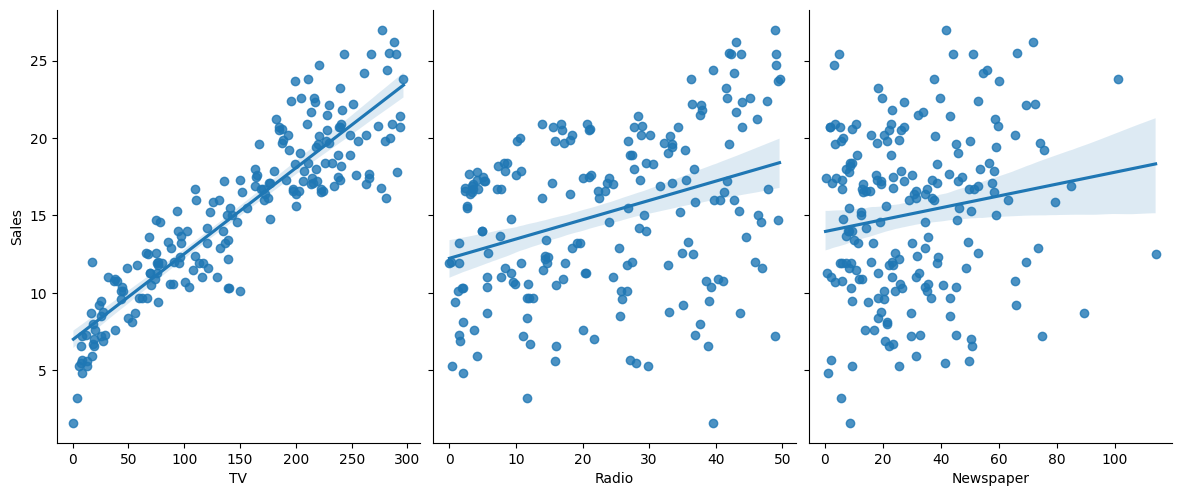

In [6]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.show()

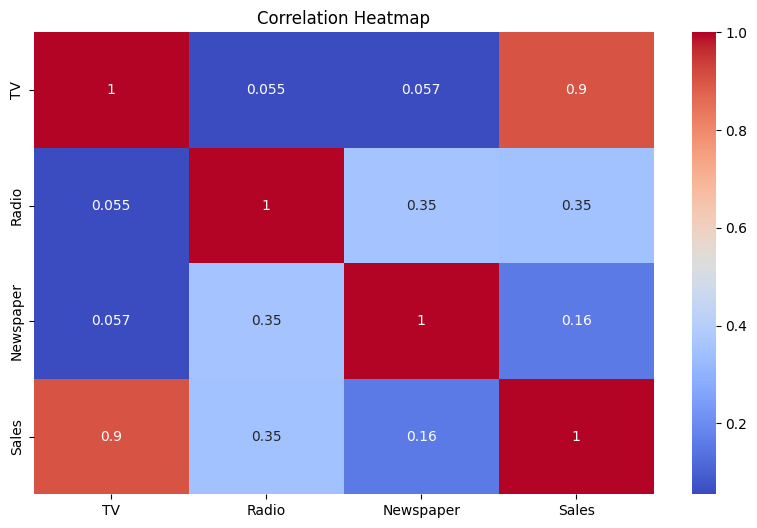

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Splitting the data into features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [9]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print("\nCoefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


In [12]:
# Predictions on test set
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Model Performance on Test Data:
Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826


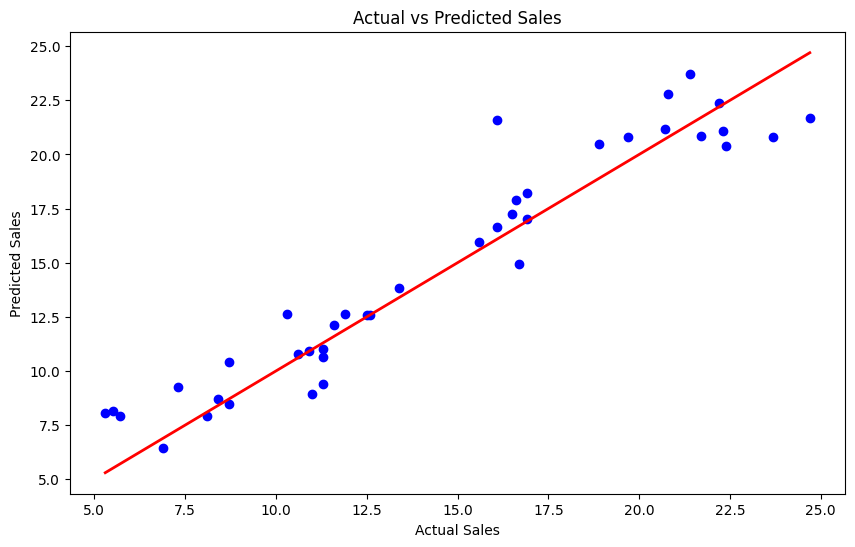

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [15]:
# Predict sales for new data
new_data = pd.DataFrame({'TV': [230], 'Radio': [37], 'Newspaper': [69]})
predicted_sales = model.predict(new_data)
print("\nPredicted Sales for new data (TV=230, Radio=37, Newspaper=69):", predicted_sales[0])


Predicted Sales for new data (TV=230, Radio=37, Newspaper=69): 21.28546573403439
